# Clustering Assignment
*Author : Jithin Prakash K*

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.  

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.   

 

And this is where you come in as a data analyst. Your job is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

# Solution

#### Connecting Google Drive to read files.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Importing required libraries and classes/modules.

In [2]:
import pandas             as pd
import seaborn            as sns
import numpy              as np
import matplotlib.pyplot  as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing    import StandardScaler
from sklearn.neighbors        import NearestNeighbors
from random                   import sample
from numpy.random             import uniform
from math                     import isnan
from sklearn.metrics          import silhouette_score
from sklearn.cluster          import KMeans

from scipy.cluster.hierarchy  import linkage, dendrogram, cut_tree

# Reading the data

In [3]:
# df_country = pd.read_csv('/content/drive/My Drive/clustering/Country-data.csv') # For GoogleDrive
df_country = pd.read_csv('Country-data.csv')

**Head**

In [4]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**Shape**

In [5]:
print('Shape of the dataframe is :',df_country.shape)

Shape of the dataframe is : (167, 10)


**Info**

In [6]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


All the data types are float except for country and income.  
There are 167 Countries in the dataset.

**Null values**

In [7]:
df_country.isnull().mean()

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no null values in any of the columns

**Unique Values**

In [8]:
df_country.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [9]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Converting Percentage to Values

In [10]:
for col_name in ['exports','health','imports']:
    df_country[col_name]=df_country[col_name]*df_country.gdpp/100

In [11]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### **Outlier Analysis**

***Describe***

In [12]:
df_country.describe(percentiles=[.25,.75,.98])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
98%,145.160000,46480.928000,7663.620000,37651.400000,74208.000000,25.988000,82.000000,6.450400,66364.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


 ***Box plot for the Numerical data***

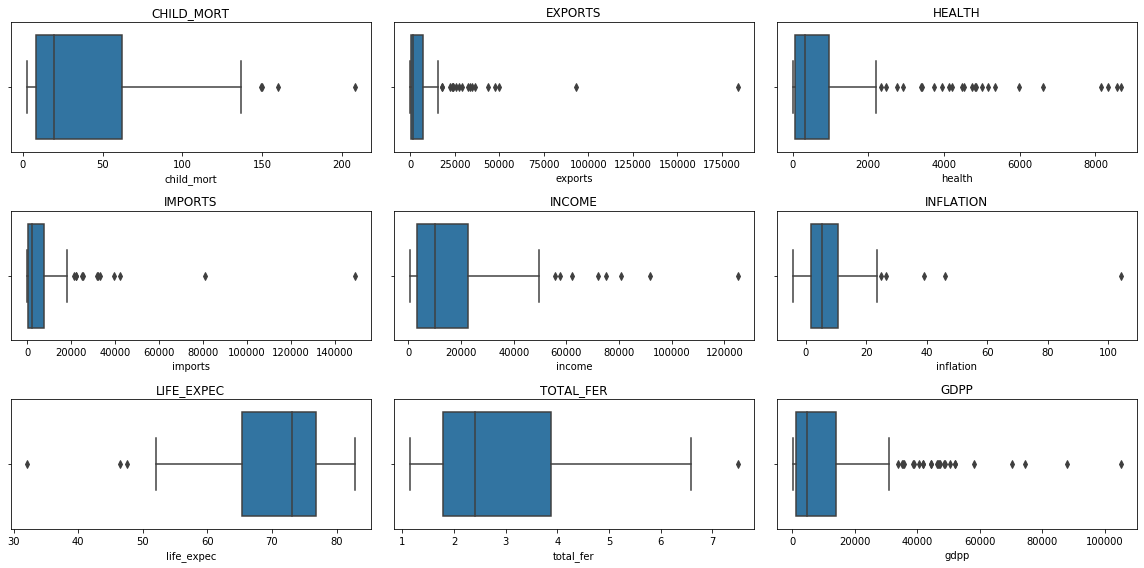

In [13]:
fig,ax = plt.subplots(3,3,figsize=(16,8))

for i,col_name in enumerate(df_country.columns[1:]):
    sns.boxplot(x=col_name,data=df_country,ax=ax.flatten()[i])
    ax.flatten()[i].set_title(col_name.upper())

plt.tight_layout()
plt.show()

***Inferences***
-  **Child_mortality** ranges between 0-145 with median 20 and there are outliers towards higher mortality.
- **Exports** ranges between 0-15000 with median 1700 and there are outliers towards higher Export values.
- **Health** ranges between 0-2100 with median 320 and there are outliers towards higher Health values.
- **Imports** ranges between 0-18000 with median 2050 and there are outliers towards higher Import values.
- **Income** value ranges between 0-50000 with median 9950 and there are outliers towards higher incomes.
- **Inflation** value ranges between -4-25 with median 5 and there are outliers towards higher values of inflation.
- **Life Expectancy** value ranges between 51-84 with median 72 and there are outliers towards lower values.
- **Total Fertility** value ranges between 1-6.5 with median 2.4 and there are outliers towards higher values.
- **GDPP** value ranges between 0-30000 with median 5000 and there are outliers towards higher GDPP values.

**Checking Outlier Countries for each Parameters**

In [14]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

**Finding and capping countries with high exports, health, imports, income and gdpp values**

The developed countries would have hight values for the above mentioned parameters.

In [15]:
features=['exports', 'health', 'imports', 'income', 'gdpp']
for col_name in features:
    display(df_country[['country',col_name]][df_country[col_name]>df_country[col_name].quantile(0.99)])

,country,exports
91,Luxembourg,183750.0
133,Singapore,93200.0


,country,health
145,Switzerland,8579.0
159,United States,8663.6


,country,imports
91,Luxembourg,149100.0
133,Singapore,81084.0


,country,income
91,Luxembourg,91700
123,Qatar,125000


,country,gdpp
91,Luxembourg,105000
114,Norway,87800


#### **Since there are outliers for the dataset, Capping the outliers to 95th percentile.**

Capping is done at the higher values only. Lower values might impact the countries who required aid.  
The data is not removed as we have only 167 countries.

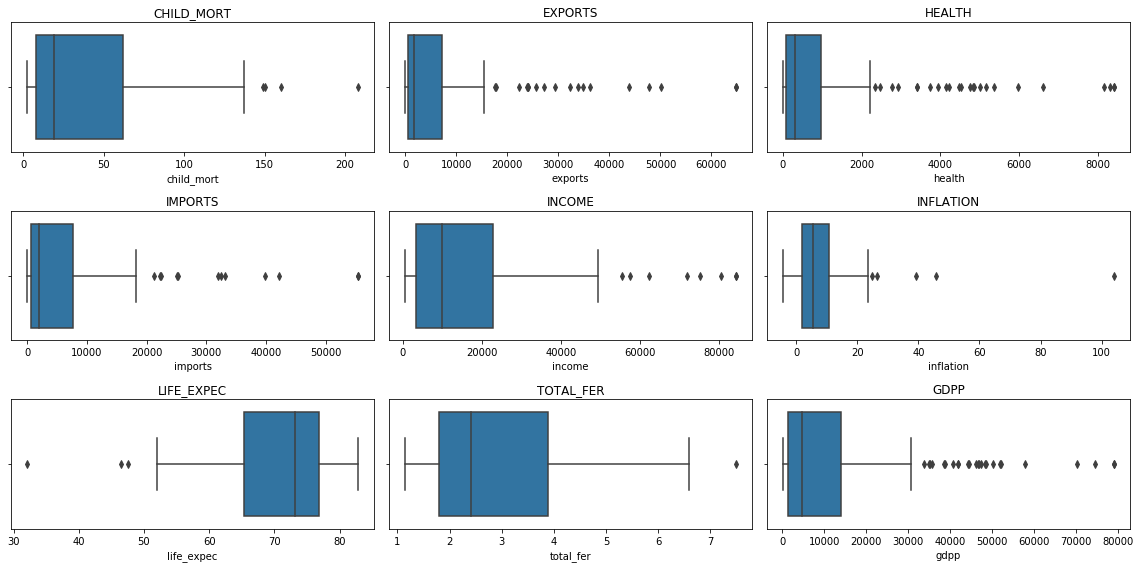

In [16]:
df_capped = df_country.copy()

fig,ax = plt.subplots(3,3,figsize=(16,8))

# Only these features are being capped
cap_features = {'exports':.99, 'health':.99, 'imports':.99, 'income':.99, 'gdpp':.99}

for i,col_name in enumerate(df_capped.columns[1:]):
    if col_name in cap_features:
        q_max = df_capped[col_name].quantile(cap_features[col_name])
        df_capped[col_name]=np.where(df_capped[col_name]>q_max,q_max,df_capped[col_name])

    sns.boxplot(x=col_name,data=df_capped,ax=ax.flatten()[i])
    ax.flatten()[i].set_title(col_name.upper())

plt.tight_layout()
plt.show()

**Bar plot for the top 10 - developed countries**

In [17]:
df_capped.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [18]:
barplot_cols_dict = {'child_mort':True, 'exports'   :False, 'health'   :False, 'imports':False, 'income':False,
                     'inflation' :True, 'life_expec':False, 'total_fer':True , 'gdpp'   :False}

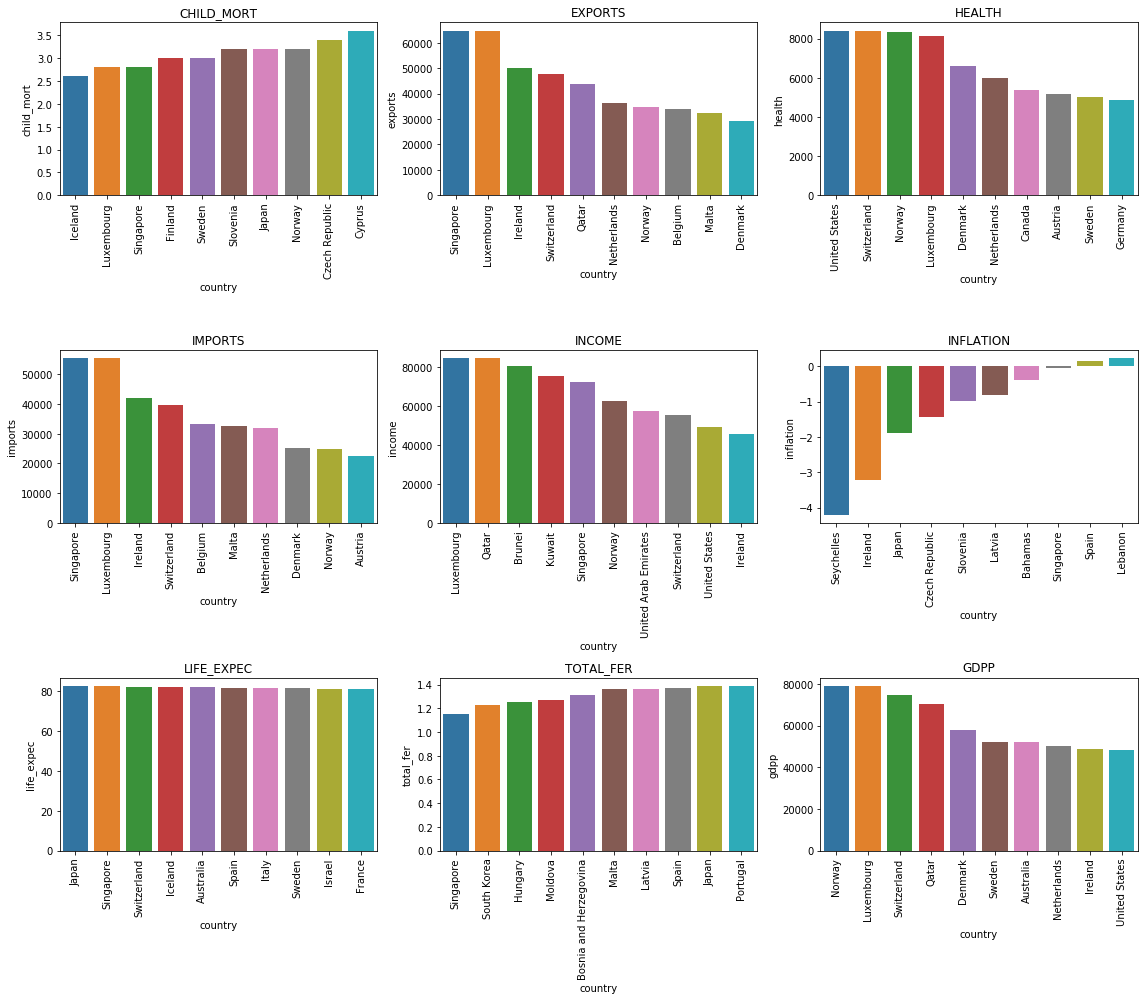

In [19]:
fig,ax = plt.subplots(3,3,figsize=(16,14))

for i,col_name in enumerate(barplot_cols_dict):
    
    ax1 = ax.flatten()[i]
    asc = (barplot_cols_dict[col_name])
    sns.barplot(x='country',y=col_name,ax=ax1,data=df_capped.sort_values(by=col_name,ascending = asc).head(10))
    ax1.set_title(col_name.upper())
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    
plt.tight_layout()
plt.show()

**Bar plot for the top 10 - under-developed countries**

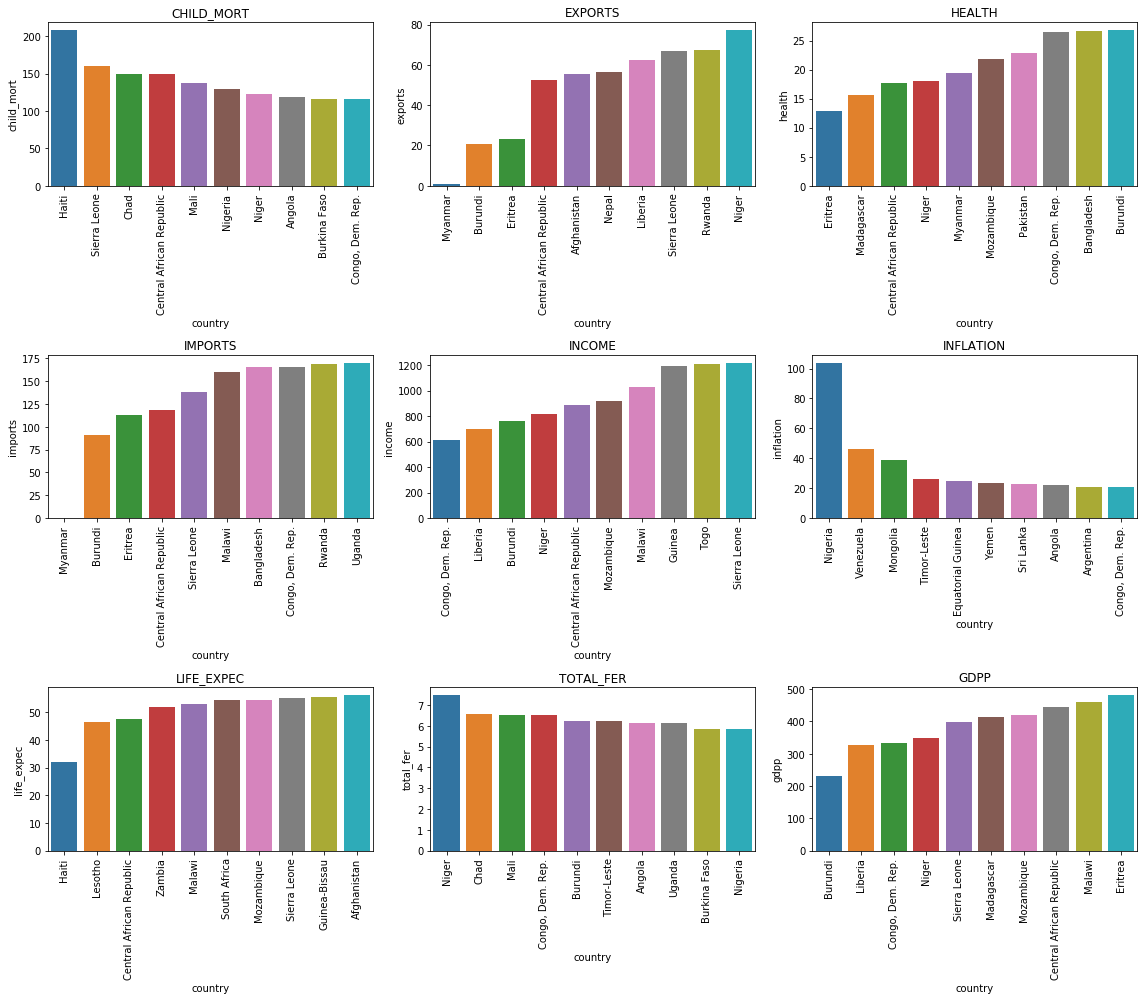

In [20]:
fig,ax = plt.subplots(3,3,figsize=(16,14))

for i,col_name in enumerate(barplot_cols_dict):
    
    ax1 = ax.flatten()[i]
    asc = not(barplot_cols_dict[col_name])
    sns.barplot(x='country',y=col_name,ax=ax1,data=df_capped.sort_values(by=col_name,ascending = asc).head(10))
    ax1.set_title(col_name.upper())
    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
    
plt.tight_layout()
plt.show()

#### **Correlation**

In [21]:
df_capped.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.399605,-0.431848,-0.431080,-0.550834,0.288276,-0.886676,0.848478,-0.497437
exports,-0.399605,1.000000,0.713208,0.970280,0.862580,-0.187065,0.498383,-0.385887,0.859493
health,-0.431848,0.713208,1.000000,0.755772,0.731904,-0.254525,0.547322,-0.409282,0.918041
imports,-0.431080,0.970280,0.755772,1.000000,0.798695,-0.244407,0.525761,-0.423306,0.838371
income,-0.550834,0.862580,0.731904,0.798695,1.000000,-0.156625,0.640307,-0.528715,0.911918
inflation,0.288276,-0.187065,-0.254525,-0.244407,-0.156625,1.000000,-0.239705,0.316921,-0.229008
life_expec,-0.886676,0.498383,0.547322,0.525761,0.640307,-0.239705,1.000000,-0.760875,0.616667
total_fer,0.848478,-0.385887,-0.409282,-0.423306,-0.528715,0.316921,-0.760875,1.000000,-0.468578
gdpp,-0.497437,0.859493,0.918041,0.838371,0.911918,-0.229008,0.616667,-0.468578,1.000000


**Heatmap for correlation**

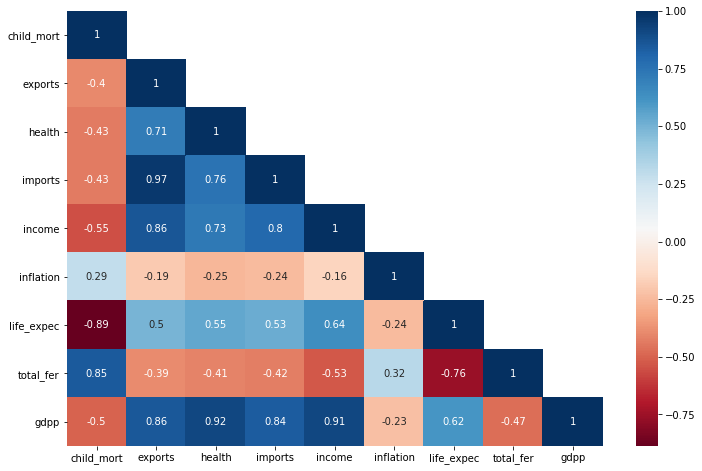

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df_capped.corr(),cmap='RdBu',annot=True,
            mask=np.triu(np.ones(len(df_capped.corr()),dtype=bool),1))
plt.show()

**Pairplot to check correlation and the distribution of the features**

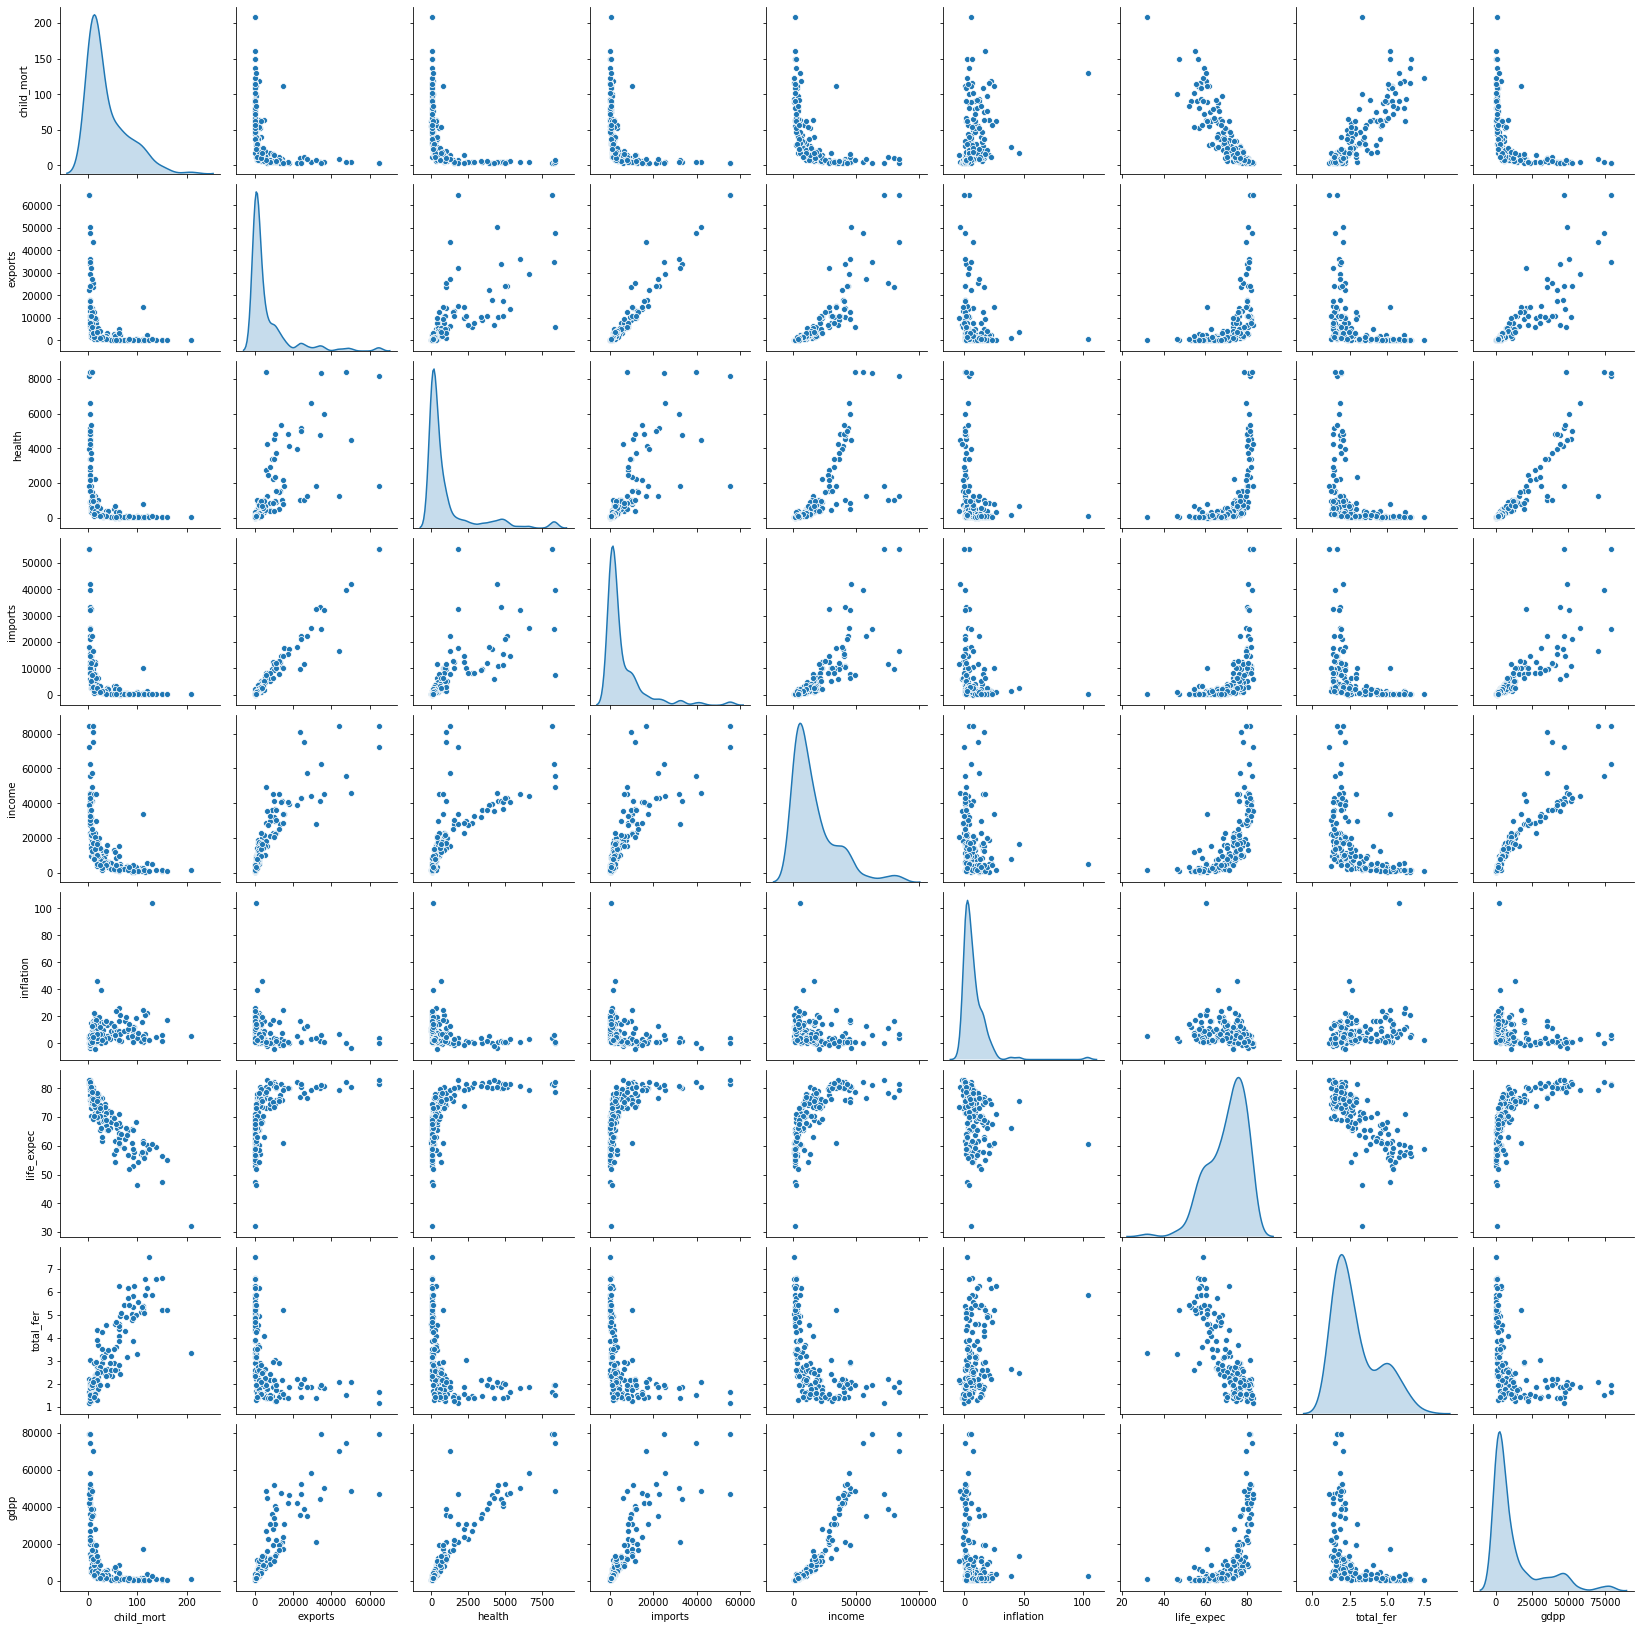

In [23]:
sns.pairplot(df_capped,diag_kind='kde')
plt.show()

***Inferences***
-  **life_expec** and **child_mort** are highly negatively correlated.
-  **total_fer** and **child_mort** are highly positively correlated.
-  **life_expec** and **total_fer** are negatively correlated.
-  **imports** and **exports** are positively correlated.
-  **income** and **exports** are highly positively correlated.
-  **gdpp** is highly positively correlated with **Income, Imports, Health and Exports** 

# Data Preparation

### Scaling the dataset

In [24]:
df_capped.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [25]:
scaler = StandardScaler()
df = df_capped.drop('country',axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [26]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [27]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


### Hopkins Statistics

In [28]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.2 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

Checking 50 score and taking average.

In [29]:
scores=[]
for i in range(50):
    scores.append(hopkins(df_scaled))

np.array(scores).mean()

0.9098080672239223

**Hopkins score is around 0.90 and is a good dataset to cluster**

## K-means Clustering

### Optimal K

In [30]:
# Sum of squared distance list
ssd = []

# Silhouette score list
sil_score = []

for k in range(2,16):
    kmeans = KMeans(n_clusters=k, max_iter=150, random_state=71)
    kmeans.fit(df_scaled)

    ssd.append(kmeans.inertia_)
    sil_score.append(silhouette_score(df_scaled, kmeans.labels_).round(6))

##### **Elbow-curve / SSD**

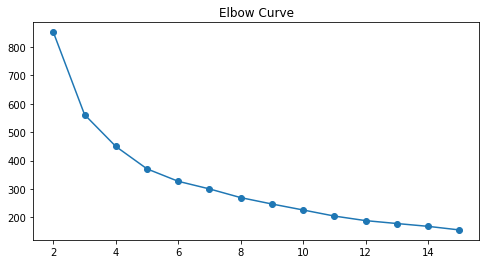

In [31]:
plt.figure(figsize=(8,4))    
plt.plot(range(2,16),ssd,marker = "o")
plt.title('Elbow Curve')
plt.show()

***Optimal K seems to be at 3 and 5***

##### **Silhouette Score**

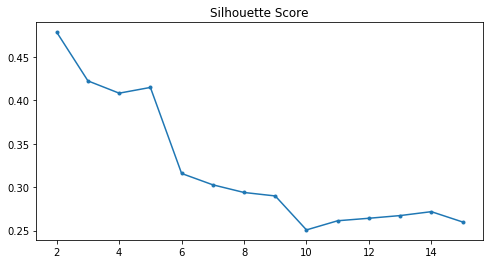

For n_clusters= 3, the silhouette score is 0.4225
For n_clusters= 4, the silhouette score is 0.4084
For n_clusters= 5, the silhouette score is 0.4150
For n_clusters= 6, the silhouette score is 0.3158
For n_clusters= 7, the silhouette score is 0.3027
For n_clusters= 8, the silhouette score is 0.2939
For n_clusters= 9, the silhouette score is 0.2899
For n_clusters=10, the silhouette score is 0.2507
For n_clusters=11, the silhouette score is 0.2613
For n_clusters=12, the silhouette score is 0.2642
For n_clusters=13, the silhouette score is 0.2673
For n_clusters=14, the silhouette score is 0.2718
For n_clusters=15, the silhouette score is 0.2599


In [32]:
plt.figure(figsize=(8,4))    
plt.plot(range(2,16),sil_score,marker='.')
plt.title('Silhouette Score')
plt.show()

for k in range(1,len(sil_score)):
  print("For n_clusters=%2d, the silhouette score is %.4f"%(k+2, sil_score[k]))

***Again Optimal K seems to be at 3 and 5***

## **Analyzing the clusters for K=5**

In [33]:
k=5
kmeans = KMeans(n_clusters=k, max_iter=100, random_state=71)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=71, tol=0.0001, verbose=0)

**Checking first 10 labels**

In [34]:
kmeans.labels_[:10]

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0])

##### **Assigning the labels to the dataframe**

In [35]:
df_capped['k_means_labels'] = kmeans.labels_
df_capped.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


**Analyzing number of countries in each cluster**

In [36]:
df_capped.k_means_labels.value_counts(sort=False)

0    82
1     9
2    46
3    29
4     1
Name: k_means_labels, dtype: int64

**Inference**
- *There are 2 clusters, cluster-1 and cluster-4 which are with less than 10 data points, 9 and 1 respectively*

##### **Pairplot**

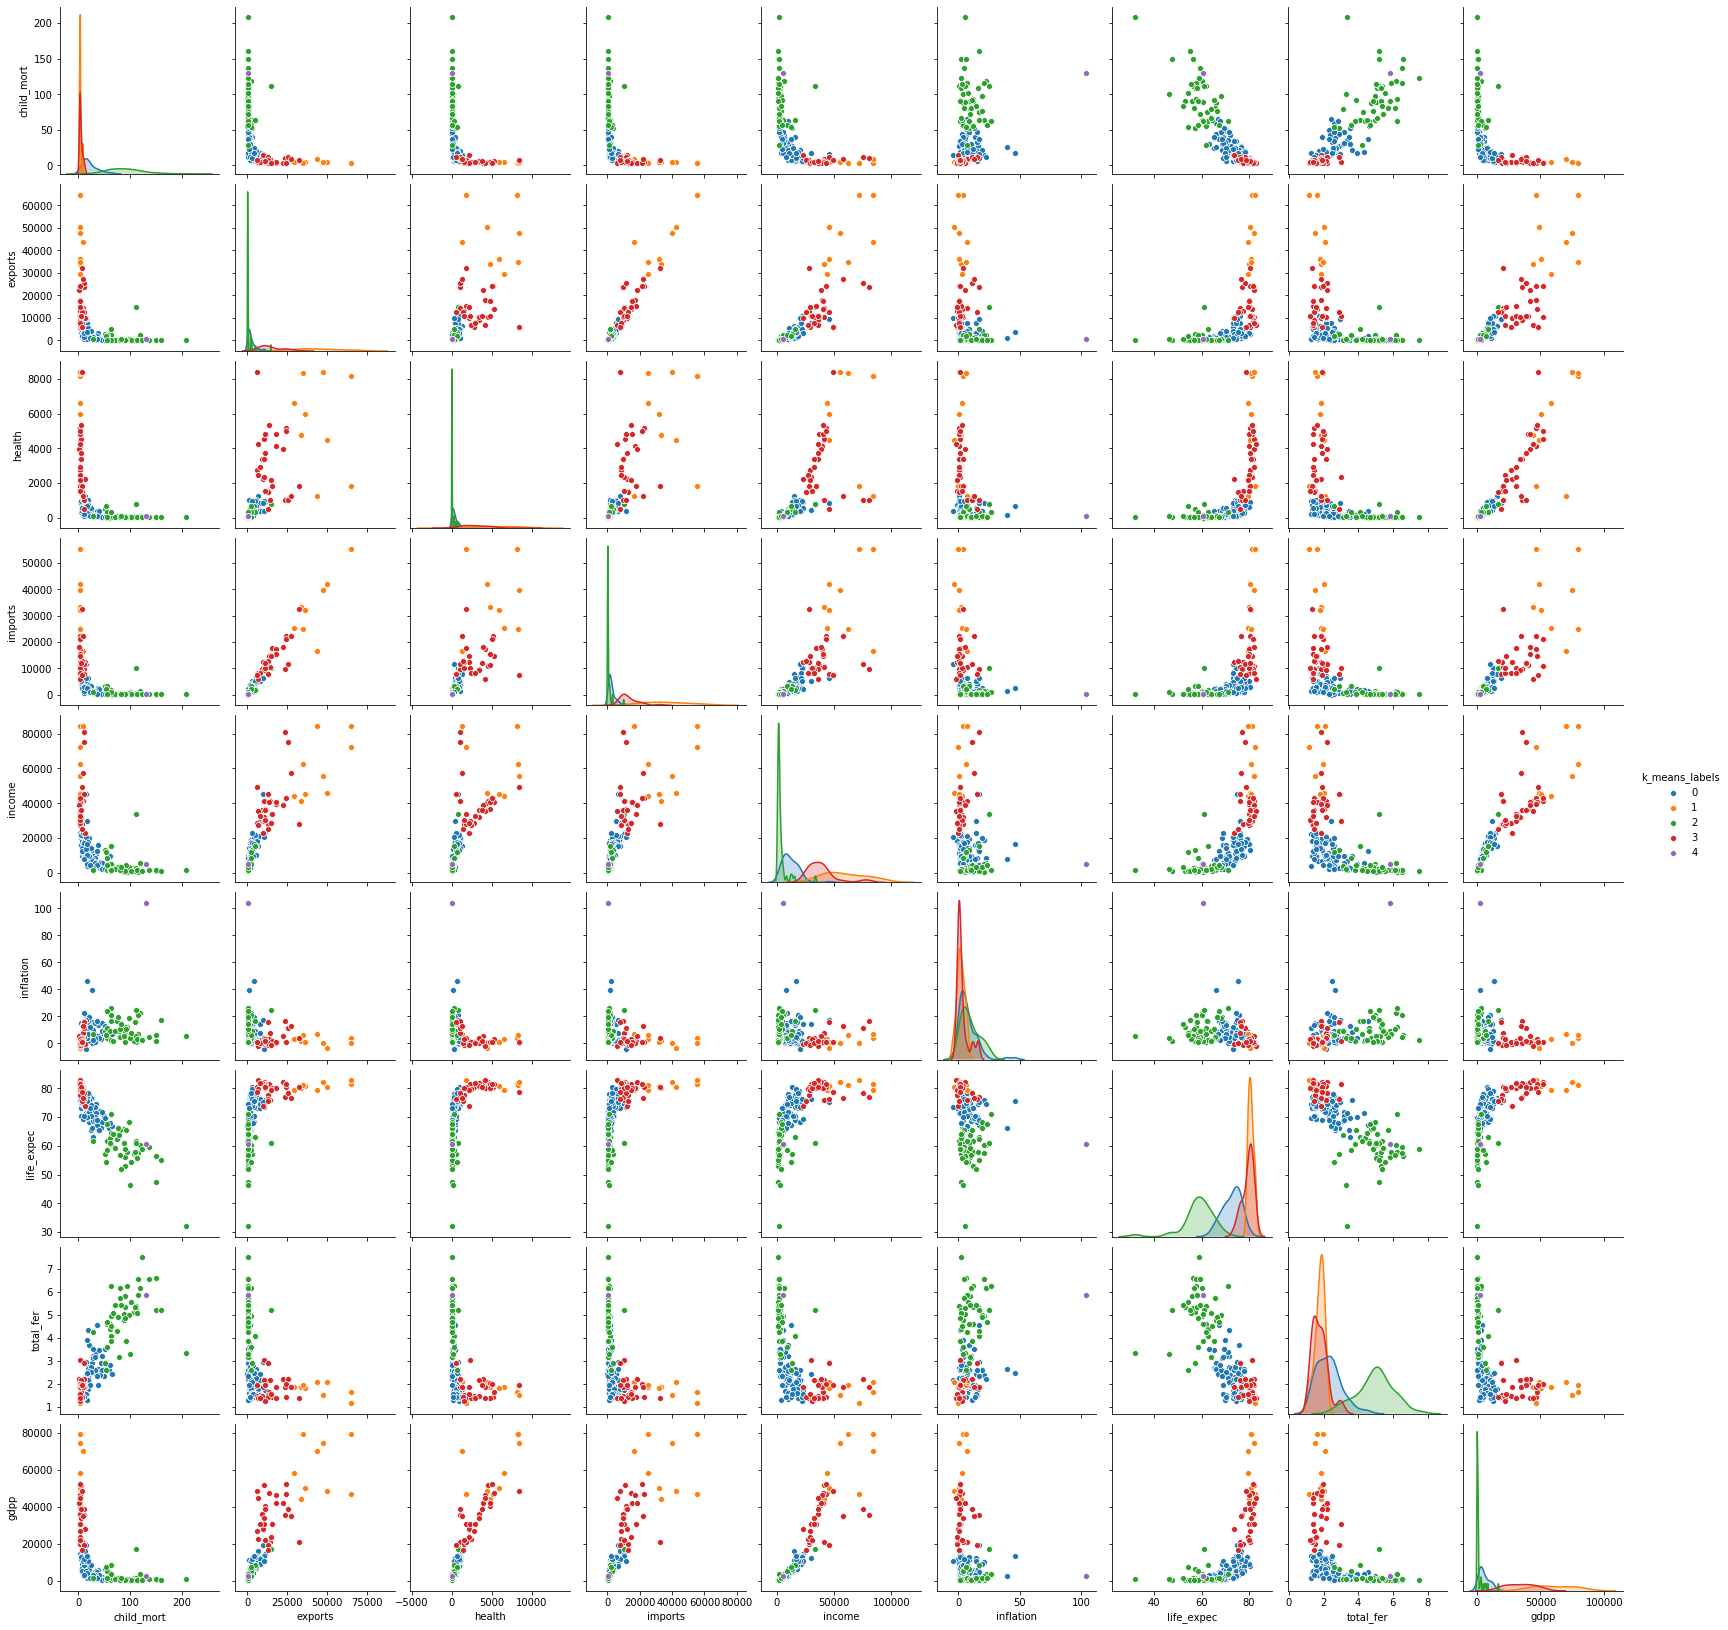

In [37]:
sns.pairplot(df_capped,diag_kind='kde',hue='k_means_labels', palette='tab10')
plt.show()

##### **Scatter plot between gdpp, child_mort and income**

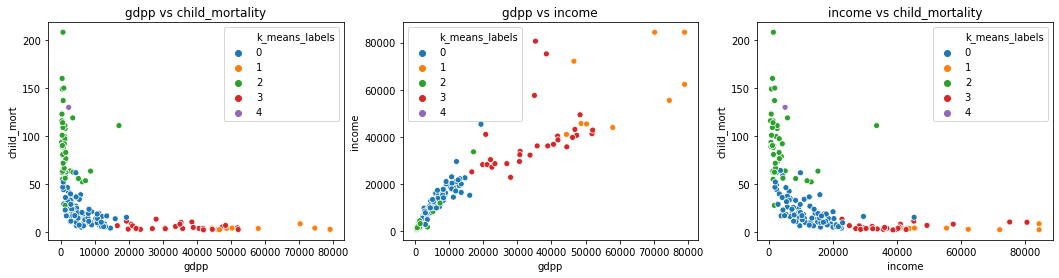

In [38]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp',y='child_mort',hue='k_means_labels',data=df_capped, palette='tab10')
plt.title('gdpp vs child_mortality')

plt.subplot(1,3,2)
sns.scatterplot(x='gdpp',y='income',hue='k_means_labels',data=df_capped, palette='tab10')
plt.title('gdpp vs income')

plt.subplot(1,3,3)
sns.scatterplot(x='income',y='child_mort',hue='k_means_labels',data=df_capped, palette='tab10')
plt.title('income vs child_mortality')

plt.show()

**Inference**
- There are 2 clusters, cluster-1 and cluster-4 which are with less than 10 data points, 9 and 1 respectively.
- These clusters are not very clear in the scatter plots.

##### **Box plot between gdpp, child_mort and income**

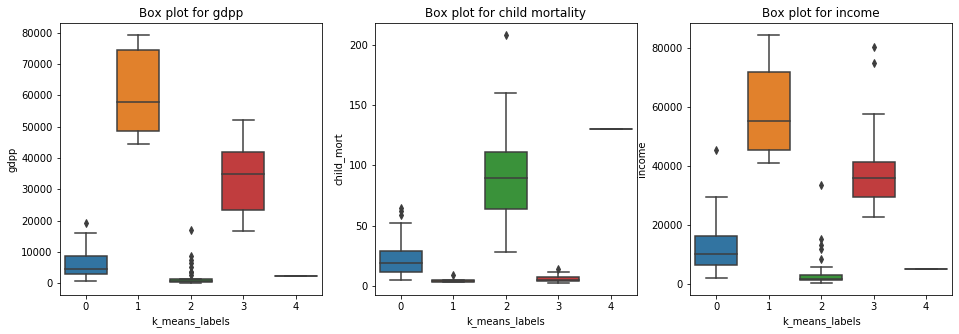

In [39]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(y='gdpp',x='k_means_labels',data=df_capped)
plt.title('Box plot for gdpp')

plt.subplot(1,3,2)
sns.boxplot(y='child_mort',x='k_means_labels',data=df_capped)
plt.title('Box plot for child mortality')

plt.subplot(1,3,3)
sns.boxplot(y='income',x='k_means_labels',data=df_capped)
plt.title('Box plot for income')

plt.show()

**Inference**
- Cluster 0 has lower distributions for gdpp, income and child morality. Medians are also at lower end.
- Cluster-1 has higher distribution and and median for gdpp and income, however the distribution and median is lower for child morality.
- Cluster-2 has lower distributions and median for gdpp and income and higher distribution and and median for child morality.
- Cluster-3 has lower distributions and median for child morality.
- Cluster-4 has only 1 data point, lower for gdpp and income, higher for child_morality.







## **Analyzing the clusters for K=3**

In [40]:
k=3
kmeans = KMeans(n_clusters=k, max_iter=100, random_state=71)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=71, tol=0.0001, verbose=0)

**Checking first 10 labels**

In [41]:
kmeans.labels_[:10]

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1])

##### **Assigning the labels to the dataframe**

In [42]:
df_capped['k_means_labels'] = kmeans.labels_
df_capped.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


**Analyzing number of countries in each cluster**

In [43]:
df_capped.k_means_labels.value_counts(sort=False)

0    48
1    92
2    27
Name: k_means_labels, dtype: int64

**Inference**
- Clusters seems to be distributed well for 3 clusters

##### **Pairplot**

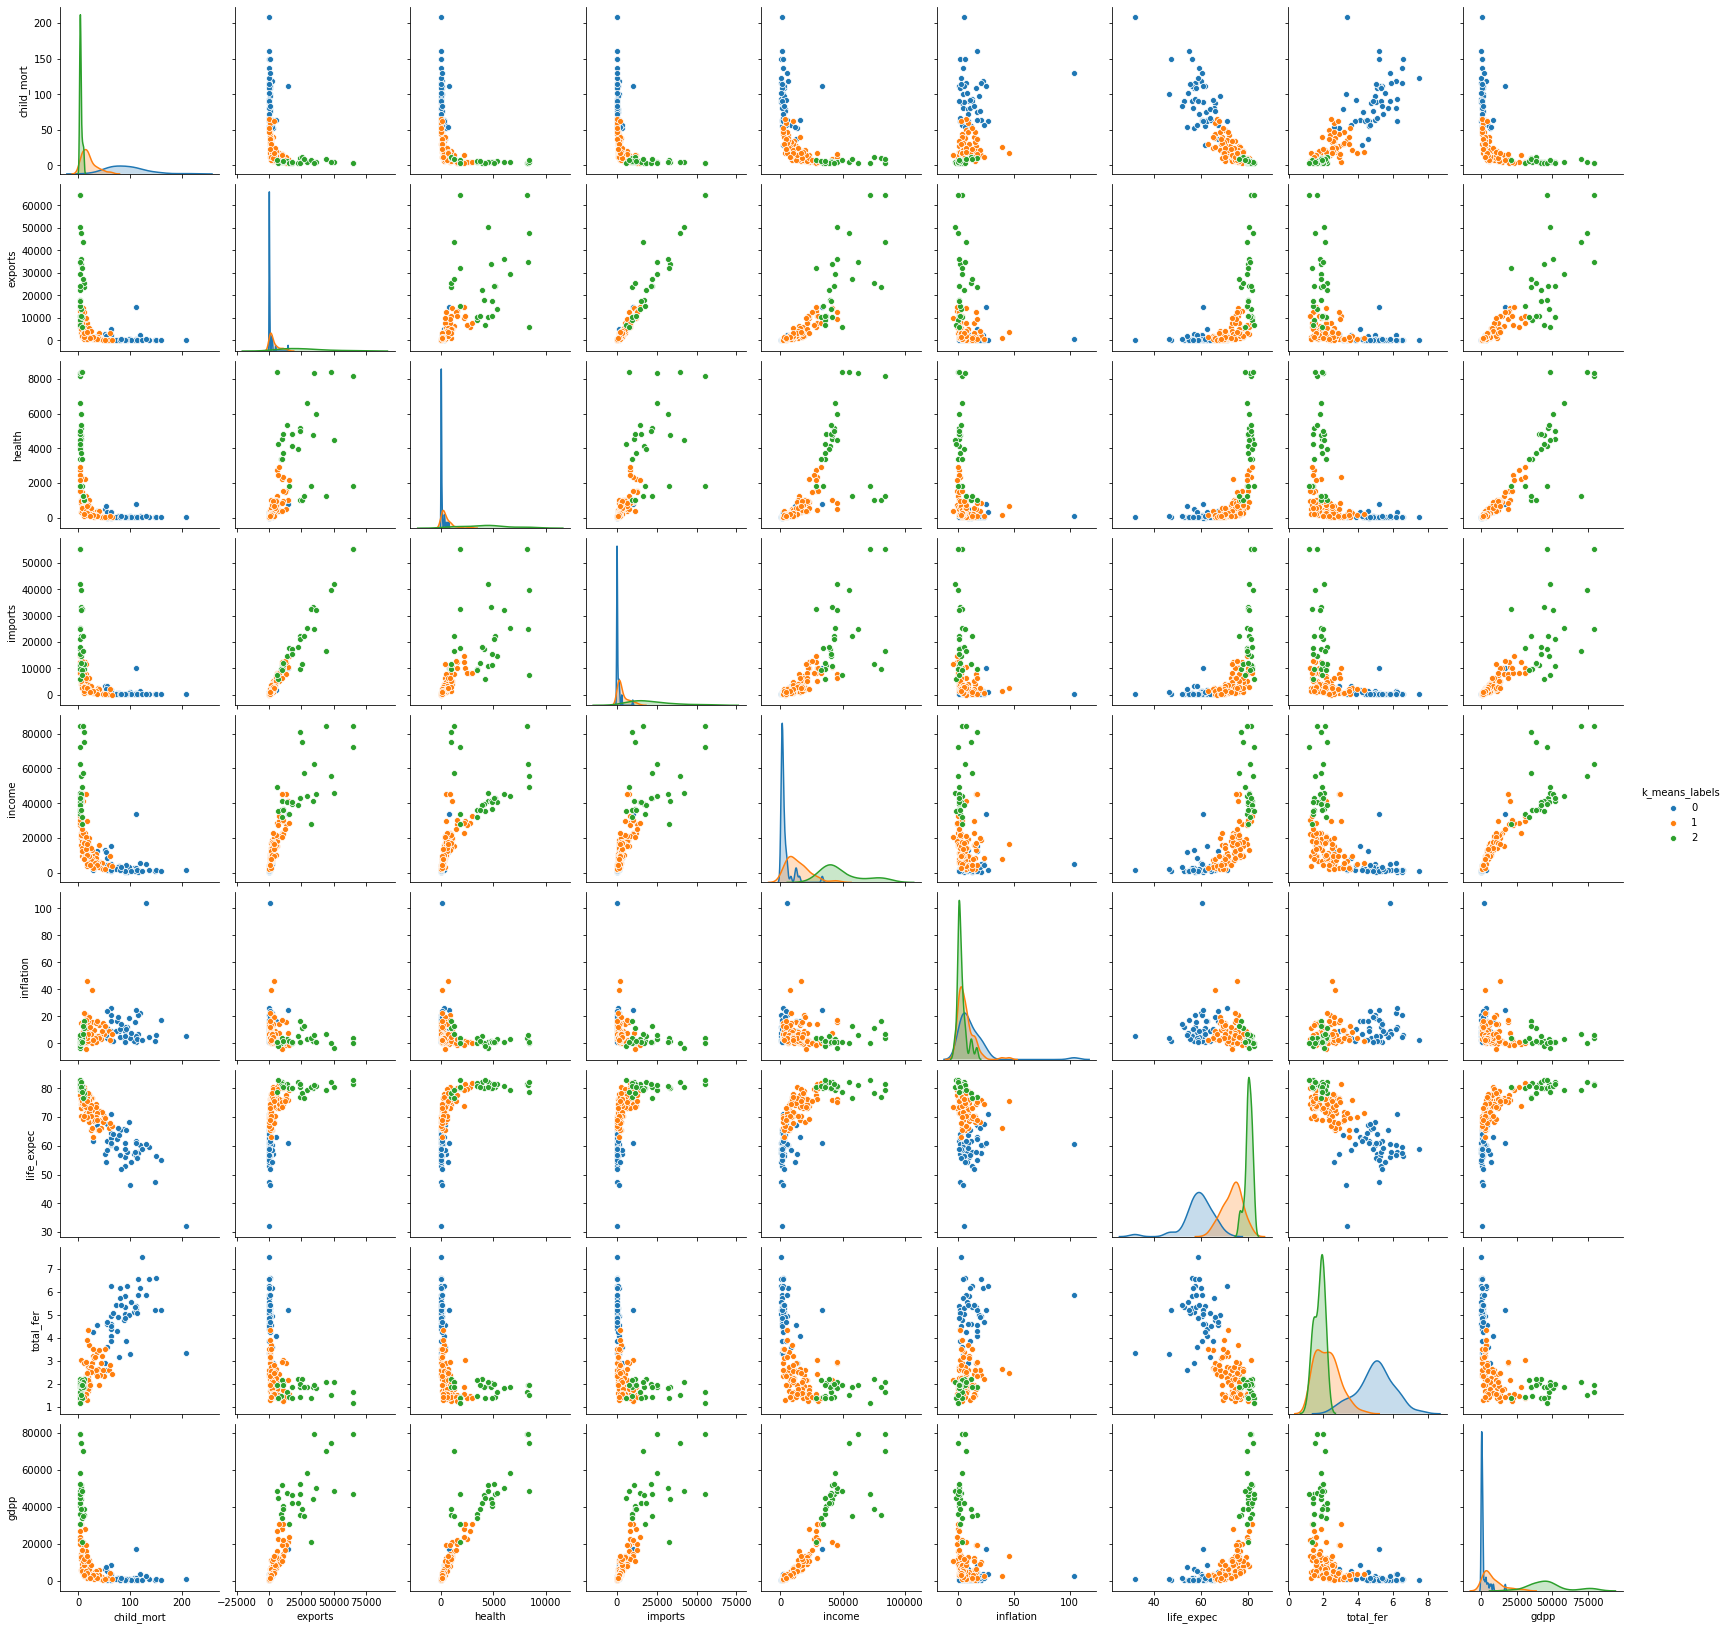

In [44]:
sns.pairplot(df_capped,diag_kind='kde',hue='k_means_labels', palette='tab10')
plt.show()

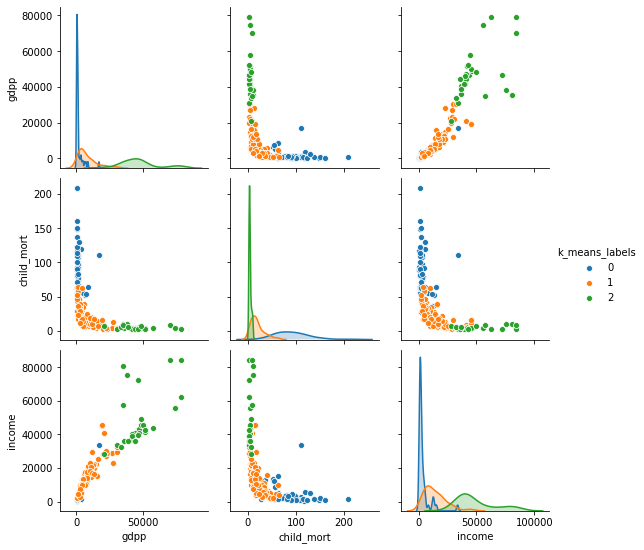

In [45]:
sns.pairplot(df_capped[['gdpp', 'child_mort', 'income','k_means_labels']],
             diag_kind='kde',hue='k_means_labels', palette='tab10', corner=False)
plt.show()

##### **Scatter plot between gdpp, child_mort and income**

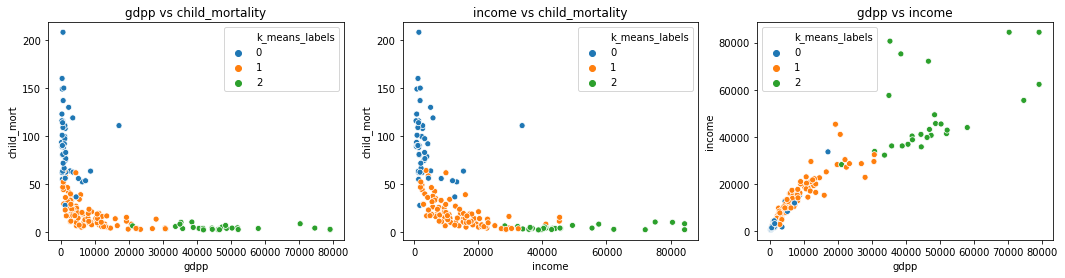

In [46]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp',y='child_mort',hue='k_means_labels',data=df_capped, palette='tab10')
plt.title('gdpp vs child_mortality')

plt.subplot(1,3,2)
sns.scatterplot(x='income',y='child_mort',hue='k_means_labels',data=df_capped, palette='tab10')
plt.title('income vs child_mortality')

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp',y='income',hue='k_means_labels',data=df_capped, palette='tab10')
plt.title('gdpp vs income')

plt.show()

**Inference**

- The clusters seems well distributed from the scatter plots.
- Cluster 0 is distributed in low gdpp, low income and high child mortality.
- Cluster 1 is distributed in low gdpp, low income and low child mortality.
- Cluster 2 is distributed in high gdpp, high income and low child mortality.

##### **Box plot between gdpp, child_mort and income**

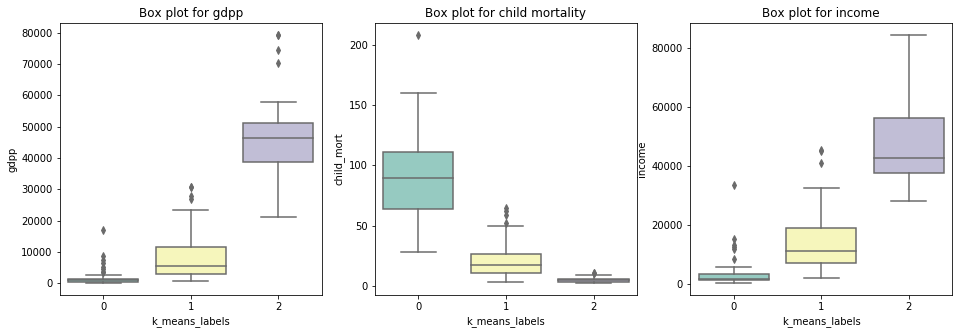

In [47]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(y='gdpp',x='k_means_labels',data=df_capped, palette='Set3')
plt.title('Box plot for gdpp')

plt.subplot(1,3,2)
sns.boxplot(y='child_mort',x='k_means_labels',data=df_capped, palette='Set3')
plt.title('Box plot for child mortality')

plt.subplot(1,3,3)
sns.boxplot(y='income',x='k_means_labels',data=df_capped, palette='Set3')
plt.title('Box plot for income')

plt.show()

**Inference**

- **Cluster-0** has low median and less distribution for gdpp and income and higher median and spread for child morality.
- **Cluster-1** has median at lower side for gdpp , income and child morality, however the distribution and mean are higher than cluster-0 and lower than cluster-2 for income and gdpp.
- **Cluster-2** has high median and higher spread for gdpp and income, however the spread and median is low for child morality.

Cluster | GDPP | Income | Child Mortality
--- | --- | --- | --- 
0 | Low | Low | High
1 | Low | Low | Low
2 | High | High |Low 


### Cluster Profiling

In [48]:
features = [ 'gdpp', 'child_mort', 'income' ]
df_capped.groupby('k_means_labels').mean()[features]

,gdpp,child_mort,income
k_means_labels,,,
0,1909.208333,91.610417,3897.354167
1,8226.869565,20.177174,14169.456522
2,47476.888889,5.092593,49057.333333


In [49]:
df_mean = df_capped.groupby('k_means_labels').mean()[features] 
display(pd.DataFrame(scaler.fit_transform(df_mean),columns=df_mean.columns))

,gdpp,child_mort,income
0,-0.858003,1.395254,-0.955995
1,-0.544586,-0.497754,-0.424530
2,1.402589,-0.897501,1.380525


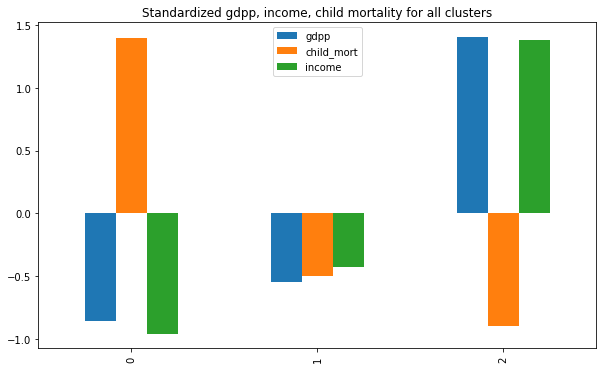

In [50]:
df_mean_scaled = pd.DataFrame(scaler.fit_transform(df_mean),columns=df_mean.columns)
df_mean_scaled.plot.bar(figsize=(10,6))
plt.title('Standardized gdpp, income, child mortality for all clusters')
plt.legend(loc='upper center')
plt.show()

**Inference**
- **Cluster 0** - Low GDPP, Low Income and High Child_mortality - These are the countries who are in need of aid.
- **Cluster 1** - Low GDPP, Low Income and Low Child Mortality
- **Cluster 2** - High GDPP, High Income and Low Child Mortality. - Developed Countries

**Developed countries - Top 10 based on gdpp,Child Mortality and Income**
___

In [51]:
features

['gdpp', 'child_mort', 'income']

In [52]:
df_aid_country = df_capped.loc[df_capped.k_means_labels==2,(['country'] +features)]
df_aid_country.sort_values(by=features,ascending=[False,True,False]).head(10).reset_index(drop=True)

,country,gdpp,child_mort,income
0,Luxembourg,79088.0,2.8,84374.0
1,Norway,79088.0,3.2,62300.0
2,Switzerland,74600.0,4.5,55500.0
3,Qatar,70300.0,9.0,84374.0
4,Denmark,58000.0,4.1,44000.0
5,Sweden,52100.0,3.0,42900.0
6,Australia,51900.0,4.8,41400.0
7,Netherlands,50300.0,4.5,45500.0
8,Ireland,48700.0,4.2,45700.0
9,United States,48400.0,7.3,49400.0


**Countries that require aid ( Under developed countries ) - Top 10 based on gdpp, Income and Child Mortality** 
____

The sort is in the order of 
1. Income *then by*
2. child_mortality *then by*
3. gdpp

The country with low gdpp, high child mortality rate and low income.


In [53]:
#df_aid_country = df_capped.loc[df_capped.k_means_labels==0]
df_aid_country = df_capped.loc[df_capped.k_means_labels==0,(['country']+features)]
df_aid_country.sort_values(by=features,ascending=[True,False,True]).head(10).reset_index(drop=True)

,country,gdpp,child_mort,income
0,Burundi,231.0,93.6,764.0
1,Liberia,327.0,89.3,700.0
2,"Congo, Dem. Rep.",334.0,116.0,609.0
3,Niger,348.0,123.0,814.0
4,Sierra Leone,399.0,160.0,1220.0
5,Madagascar,413.0,62.2,1390.0
6,Mozambique,419.0,101.0,918.0
7,Central African Republic,446.0,149.0,888.0
8,Malawi,459.0,90.5,1030.0
9,Eritrea,482.0,55.2,1420.0


## Hierarchical Clustering

In [54]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


**Single Linkage**

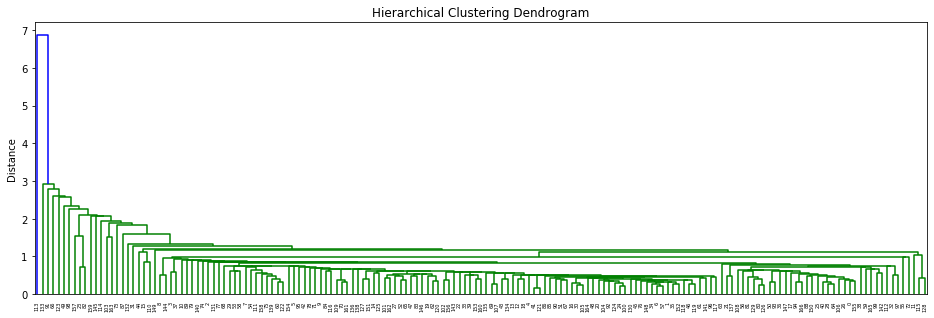

In [55]:
mergings = linkage(df_scaled, method="single", metric='euclidean')
plt.figure(figsize=(16,5))
dendrogram(mergings)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()

The dendrogram is not proper so trying with complete linkage

**Complete Linkage**

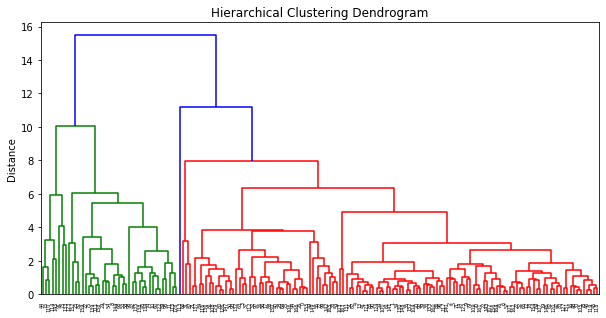

In [56]:
mergings = linkage(df_scaled, method="complete", metric='euclidean')
plt.figure(figsize=(10,5))
dendrogram(mergings)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()

### **Cutting the dendrogram at 4 clusters( Distance : 8-10 )**

In [57]:
k=4
cluster_labels = cut_tree(mergings, n_clusters=k).reshape(-1, )
cluster_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [58]:
df_capped.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


#### **Assigning labels back to dataframe**

In [59]:
df_capped['hierarchical_labels'] = cluster_labels
df_capped.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_labels,hierarchical_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


In [60]:
df_capped.hierarchical_labels.value_counts(sort=False)

0    125
1     33
2      8
3      1
Name: hierarchical_labels, dtype: int64

**Inference**
* Clusters 2 and 3 are less in number - 8 and 1 data points respectively

#### **Pairplot**

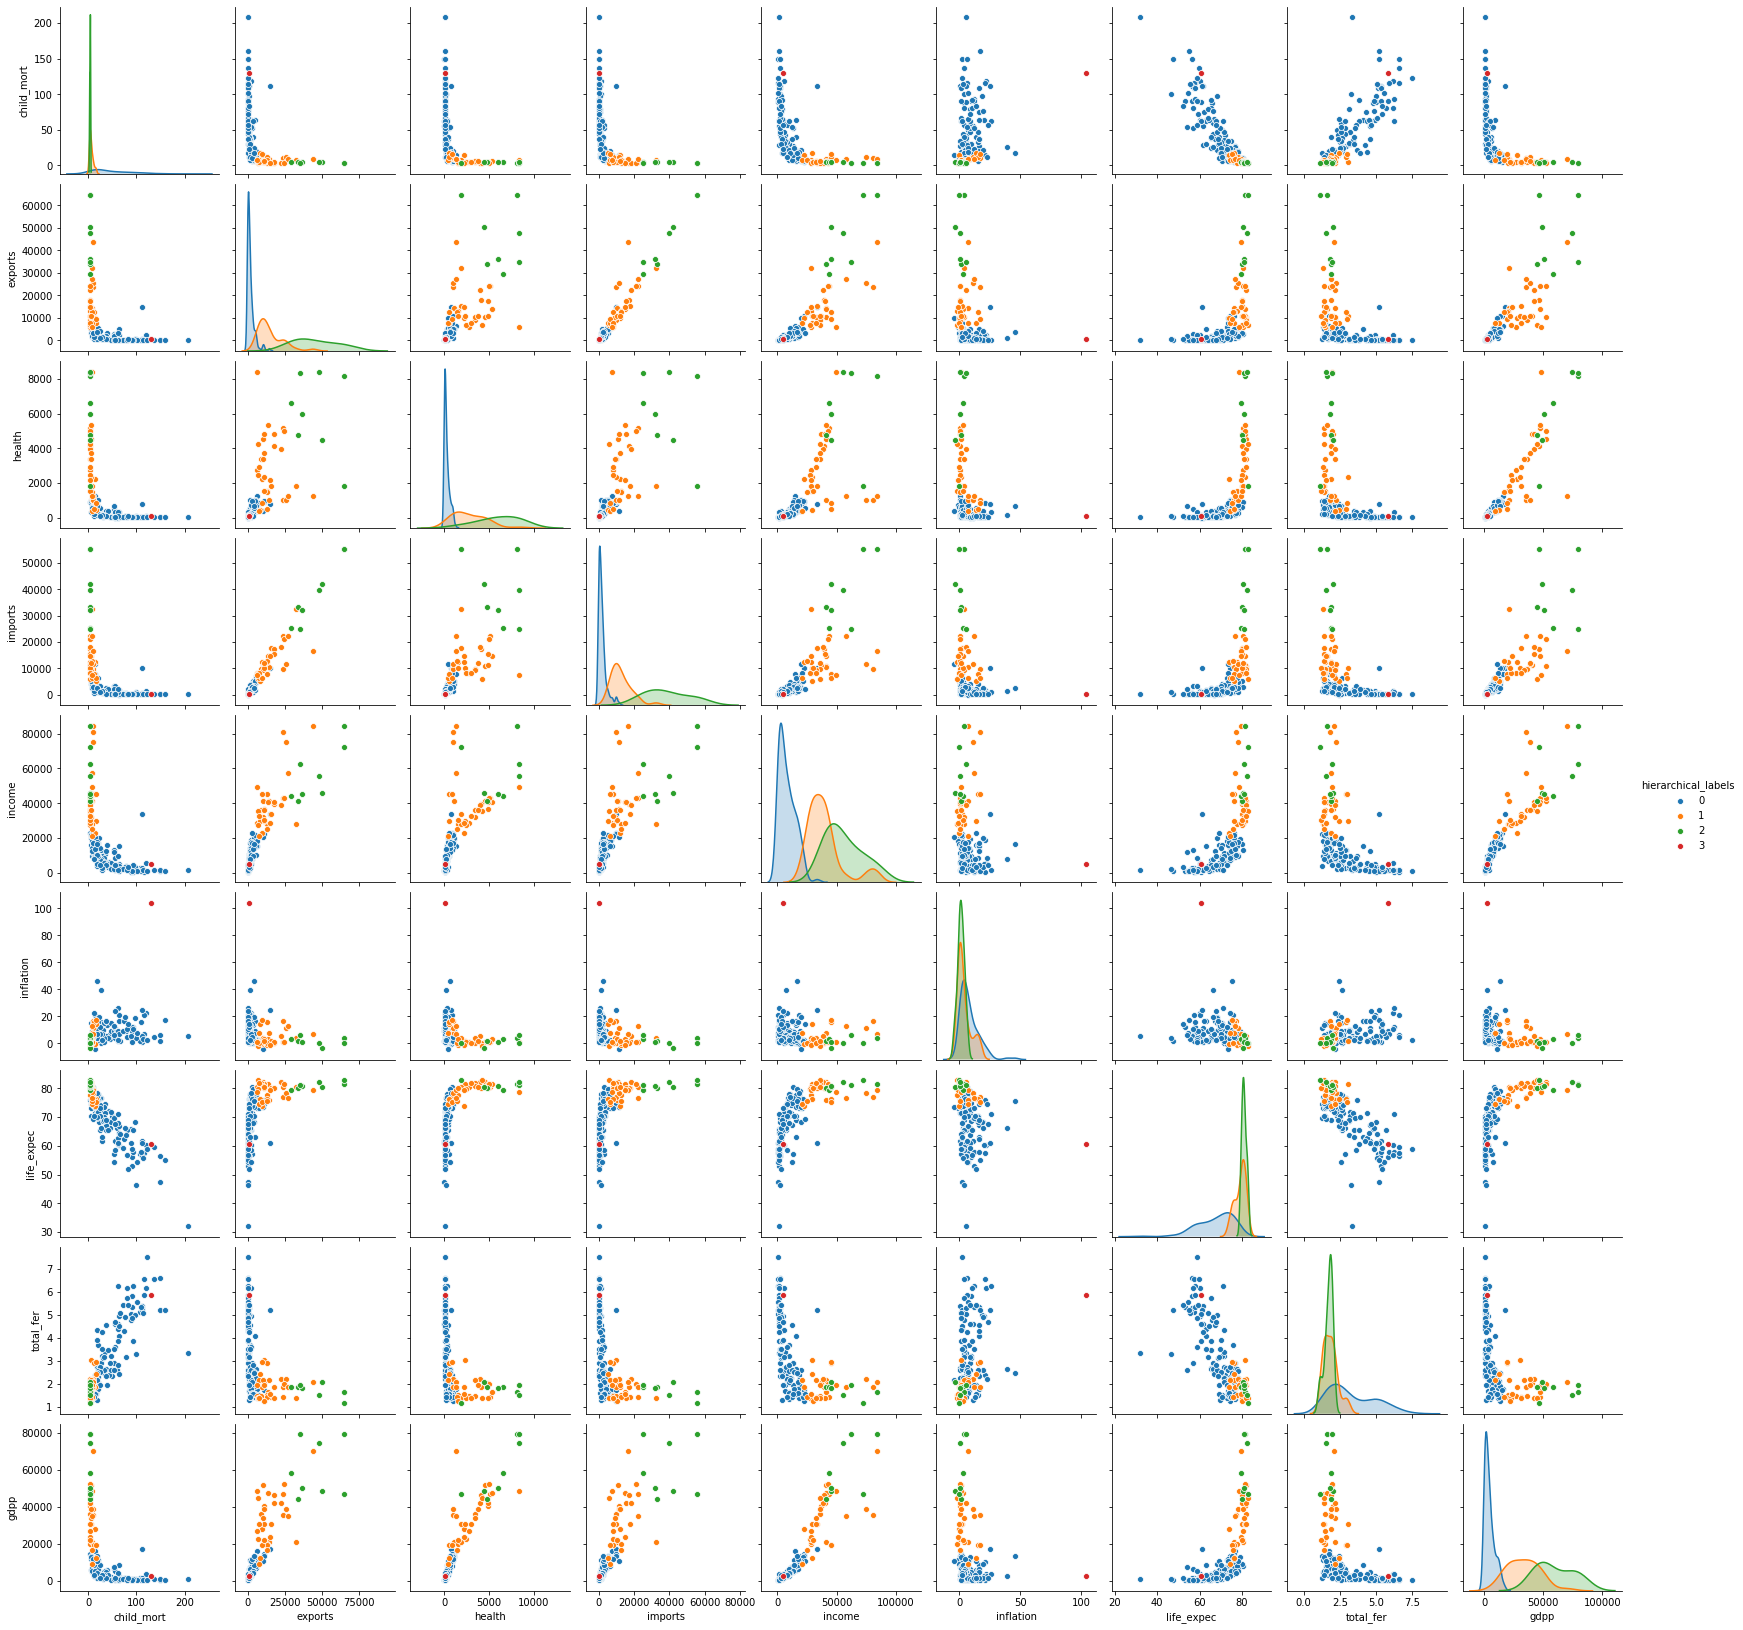

In [61]:
sns.pairplot(df_capped.drop(columns='k_means_labels'),
             diag_kind='kde',hue='hierarchical_labels', palette='tab10')
plt.show()

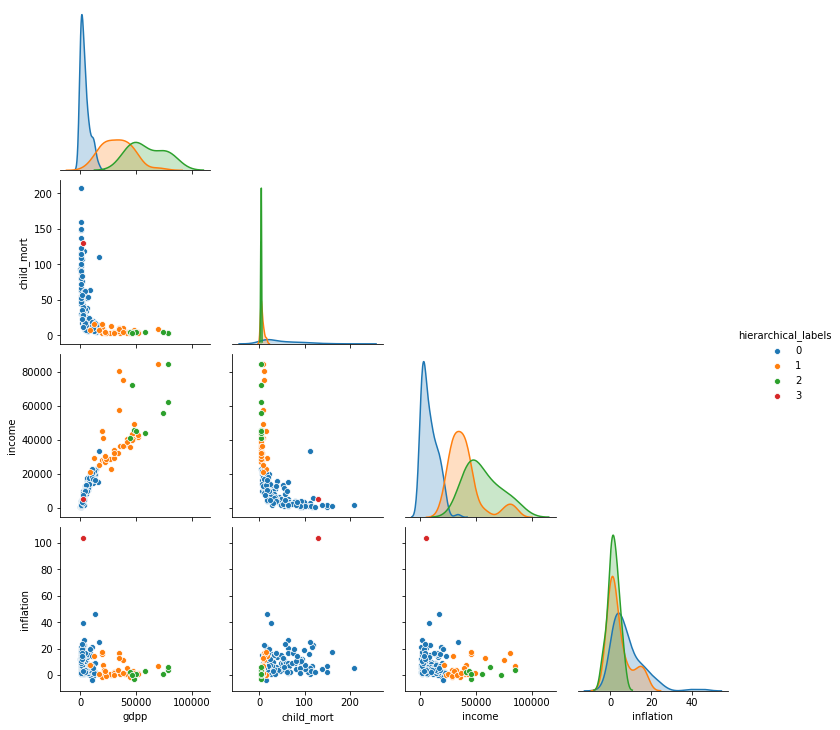

In [62]:
sns.pairplot(df_capped[['gdpp', 'child_mort', 'income','inflation','hierarchical_labels']],
             diag_kind='kde',hue='hierarchical_labels', palette='tab10',corner=True)
plt.show()

***Cluster 3, clearly shows a distinction for inflation, the outlier or only one data point at 104 is marked as cluster 3.***

#### **Scatter plot between gdpp, child_mort and income**

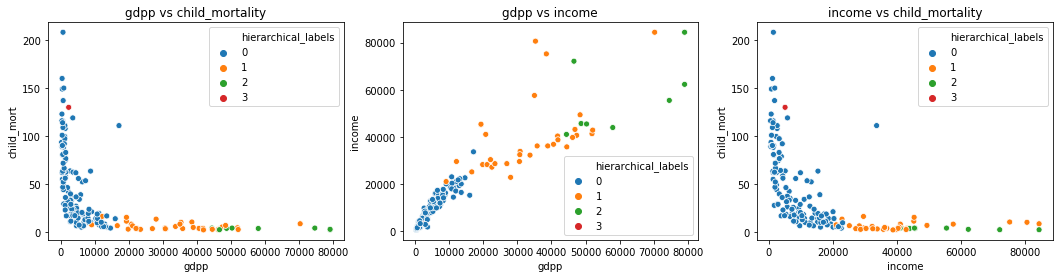

In [63]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp',y='child_mort',hue='hierarchical_labels',data=df_capped, palette='tab10')
plt.title('gdpp vs child_mortality')

plt.subplot(1,3,2)
sns.scatterplot(x='gdpp',y='income',hue='hierarchical_labels',data=df_capped, palette='tab10')
plt.title('gdpp vs income')

plt.subplot(1,3,3)
sns.scatterplot(x='income',y='child_mort',hue='hierarchical_labels',data=df_capped, palette='tab10')
plt.title('income vs child_mortality')

plt.show()

**Inference**

- There are 2 clusters, cluster-3 and cluster-2 which are with less than 10 data points, 1 and 8 respectively.
- **Cluster 0** has low GDPP, low income and high child mortality.
- **Cluster 1** has low GDPP, low income and low child mortality.
- **Cluster 2** has high GDPP, high income and low child mortality.
- **Cluster 3** has low GDPP, low income and high child mortality.



#### **Box plot between gdpp, child_mort and income**

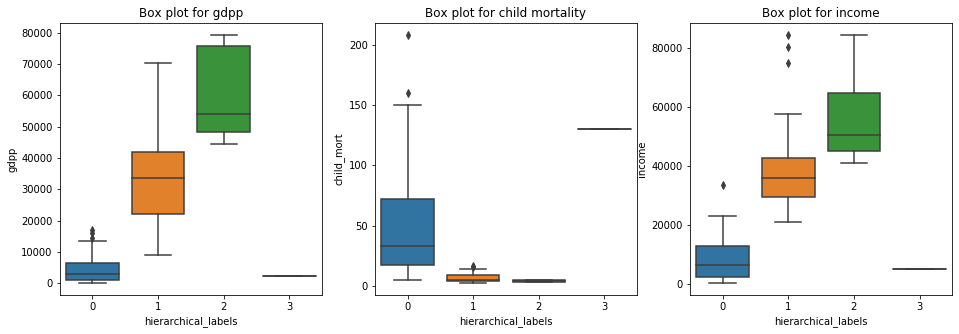

In [64]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.boxplot(y='gdpp',x='hierarchical_labels',data=df_capped)
plt.title('Box plot for gdpp')

plt.subplot(1,3,2)
sns.boxplot(y='child_mort',x='hierarchical_labels',data=df_capped)
plt.title('Box plot for child mortality')

plt.subplot(1,3,3)
sns.boxplot(y='income',x='hierarchical_labels',data=df_capped)
plt.title('Box plot for income')

plt.show()

**Inference**
- Cluster 0 has lower distributions for gdpp and income and higher distribution for child morality.
- Cluster-1 has higher spread for income and gdpp and lower spread and median for child mortality.
- Cluster-2 has higher spread and median for income and gdpp and lower spread and median for child mortality.
-    Cluster-3 has only 1 data point lower value for gdpp and income and higher value for child morality.


### Cluster Profiling

In [65]:
df_capped.groupby('hierarchical_labels').mean()[features]

,gdpp,child_mort,income
hierarchical_labels,,,
0,4360.912000,48.123200,8396.104000
1,33399.090909,6.518182,39696.181818
2,60097.000000,3.825000,56321.750000
3,2330.000000,130.000000,5150.000000


In [66]:
df_mean = df_capped.groupby('hierarchical_labels').mean()[features] 
display(pd.DataFrame(scaler.fit_transform(df_mean),columns=df_mean.columns))

,gdpp,child_mort,income
0,-0.873700,0.019748,-0.884711
1,0.352775,-0.796466,0.573129
2,1.480405,-0.849301,1.347485
3,-0.959479,1.626019,-1.035902


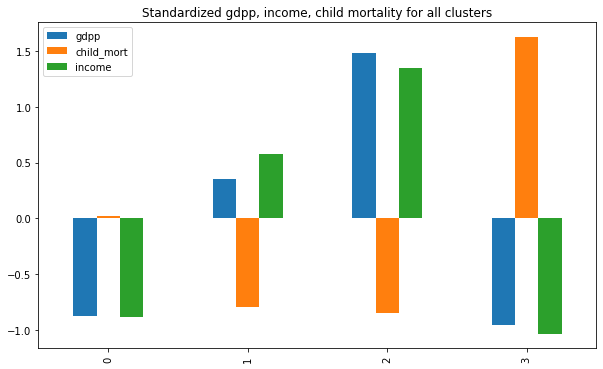

In [67]:
df_mean_scaled = pd.DataFrame(scaler.fit_transform(df_mean),columns=df_mean.columns)
df_mean_scaled.plot.bar(figsize=(10,6))
plt.title('Standardized gdpp, income, child mortality for all clusters')
plt.legend(loc='upper left')
plt.show()

**Inference**
- **Cluster 0 and Cluster 3** - Low GDPP, Low Income and High Child_mortality - These are the countries who are in need of aid.
- **Cluster 1** - Low GDPP, Low Income and Low Child Mortality
- **Cluster 2** - High GDPP, High Income and Low Child Mortality.

**Developed Countries**
____

In [68]:
df_aid_country = df_capped.loc[df_capped.hierarchical_labels==2,(['country']+features)] 
df_aid_country.sort_values(by=features,ascending=[False,True,False]).head(10).reset_index(drop=True)

,country,gdpp,child_mort,income
0,Luxembourg,79088.0,2.8,84374.0
1,Norway,79088.0,3.2,62300.0
2,Switzerland,74600.0,4.5,55500.0
3,Denmark,58000.0,4.1,44000.0
4,Netherlands,50300.0,4.5,45500.0
5,Ireland,48700.0,4.2,45700.0
6,Singapore,46600.0,2.8,72100.0
7,Belgium,44400.0,4.5,41100.0


**Countries that require aid**
____

The sort is in the order of 
1. Income *then by*
2. child_mortality *then by*
3. gdpp

The country with low gdpp, high child mortality rate and low income.


**For cluster label = 3**

In [69]:
df_aid_country = df_capped.loc[df_capped.hierarchical_labels==3,(['country']+features)] 
df_aid_country.sort_values(by=features,ascending=[True,False,True]).reset_index(drop=True)

,country,gdpp,child_mort,income
0,Nigeria,2330.0,130.0,5150.0


**For cluster label = 0**

In [70]:
df_aid_country = df_capped.loc[(df_capped.hierarchical_labels==0),(['country']+features)] 
df_aid_country.sort_values(by=features,ascending=[True,False,True]).head(10).reset_index(drop=True)

,country,gdpp,child_mort,income
0,Burundi,231.0,93.6,764.0
1,Liberia,327.0,89.3,700.0
2,"Congo, Dem. Rep.",334.0,116.0,609.0
3,Niger,348.0,123.0,814.0
4,Sierra Leone,399.0,160.0,1220.0
5,Madagascar,413.0,62.2,1390.0
6,Mozambique,419.0,101.0,918.0
7,Central African Republic,446.0,149.0,888.0
8,Malawi,459.0,90.5,1030.0
9,Eritrea,482.0,55.2,1420.0
